In [2]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Dodatkowe zadanie kwalifikacyjne

**Opis:**

- Celem zadania jest opracowanie strategii optymalizującej zysk, uwzględniającej ryzyko, w warunkach deterministycznych generacji cen.

\
**Opis mechanizmu generacji ścieżek cenowych:**

- Ścieżka cenowa zaczyna się od poziomu 100 punktów i składa się z 101 okresów.

- W każdym okresie cena ulega 1 punktowej zmianie na podstawie losowanej wartości z listy zmian.

- Lista zmian zawiera 50 wartości "+1 pkt." oraz 50 wartości "-1 pkt.", tak aby suma zmian ceny była równa 0.

\
**Zasady tworzenia strategii:**

- Strategia opiera się na iteracji poprzez każdy okres wygenerowanej ścieżki.

- Podczas każdej iteracji strategia korzysta tylko z informacji o ścieżce cenowej z poprzednich i bieżących iteracji.

- Strategia zwraca sygnał podczas każdej iteracji, informujący o zmianie pozycji w następnej iteracji.

- Sygnał strategii mieści się w przedziale od -10 do +10 i oznacza zmianę (nie deklarację!) pozycji o wartość sygnału.\
np:\
okres 1) pozycja = 10, sygnał -5\
okres 2) pozycja = 5 ponieważ: pozycja(t) = pozycja(t-1) + sygnał(t-1)

- Kierunek pozycji oraz jej wielkość bezpośrednio wpływają na wynik strategii w każdej iteracji, zgodnie z równaniem:\
wynik(t) = (cena(t)-cena(t-1)) * pozycja

- Dodatkowo, od każdej zmiany pozycji naliczana jest opłata transakcyjna wynosząca 0,2 punkta za każdy punkt w zmianie pozycji.\
np:\
okres 1) pozycja = 10, sygnał -5\
okres 2) pozycja = 5, opłata = 2,5 ponieważ: opłata(t) = |pozycja(t-1) - pozycja(t)| * 0,5

\
**Metodyka obliczania wyniku strategii:**

- Ostateczny wynik strategii będzie oceniany na podstawie listy wyników strategii z 10 000 wygenerowanych ścieżek cenowych.

- Wynik strategii to suma pojedynczych wyników z każdej ścieżki, podzielona przez ich standardowe odchylenie.

\
**Implementacja strategii:**

- Strategię można przygotować w formie kodu lub opisać jako logiczny proces składający się z zdań typu "jeżeli x, to y".

- Strategie będą przedstawiane przez max. 10 min. podczas rozmowy z testującym.

- Podczas rozmowy indywidualnej sprawdzane będzie, czy dostarczony kod spełnia zasady tworzenia strategii. W przypadku przedstawienia tylko procesu logicznego, testujący przeprowadzi implementację logiki do postaci kodu.

- Testowanie strategii odbędzie się w obecności wszytskich uczestników po etapie rozmów indywidualnych.



## funkcja generacji ścieżki (nie zmieniać)

In [3]:
def generate_path():
    
    # tworzenie listy 50 ruchów +1 i 50 ruchów -1
    moves_lst = ([1] * 50) + ([-1] * 50)
    
    # losowa zmiana kolejności 
    random.shuffle(moves_lst)
    
    # zamiana ruchów na ścieżkę cenową
    moves_lst = [100] + moves_lst
    path = {i: price for i, price in enumerate(np.cumsum(moves_lst))}
    
    return path


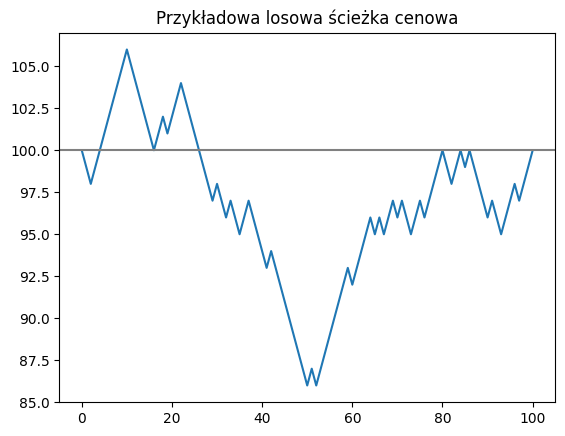

In [4]:
fig, ax = plt.subplots()

ax.plot(generate_path().values())
ax.axhline(y=100, color='gray')

ax.set_title('Przykładowa losowa ścieżka cenowa')

plt.show()

# funkcja strategii

In [48]:
def strategy(posted_path, position):
    '''
    Parametry:
    
    -posted_path(list): Lista zawierająca ceny z poprzednich i aktualnych iteracji ścieżki cenowej.
    
    -position(float): Aktualna pozycja przedstawiona liczbowo.
    
    Zwraca:
    
    - signal(float): Sygnał strategii na daną iteracje.
    
    '''
    
    # TUTAJ TEKST LOGICZNY STRATEGII:
    
    # Przykładowa strategia:
    
    # cena z ostatniej iteracji
    last_price = posted_path[-1]
    
    signal = 1
    return signal


# funkcja testowania strategii (nie zmieniać)

In [49]:
def test(no_of_iterations, strategy):
    iterations_results = []
    
    for i in range(no_of_iterations):
        price_path = generate_path()
        
        results_dict = {t: {'price':price, 'position':0, 'fee': 0, 'result':0} for t, price in price_path.items()}
        
        position = 0
        fee = 0
        result = 0
        
        ticks = sorted(results_dict.keys())
        for t in range(len(ticks)):
            posted_path = [results_dict[tick]['price'] for tick in ticks if tick<=t]
            positions = [results_dict[tick]['position'] for tick in ticks if tick<=t]
            
            if t>0:
                result = ((posted_path[t] - posted_path[t-1])*position)-fee
            else:
                result = 0
                
            results_dict[t]['result'] = result
            results_dict[t]['position'] = position
            results_dict[t]['fee'] = fee
            
            signal = strategy(posted_path, positions[-1])

            position = positions[-1] + signal
            fee = abs(positions[-1] - position) * 0.2
            
        results = sum([results_dict[t]['result'] for t in results_dict.keys()])
        iterations_results.append(results)
        
    return iterations_results


In [50]:
strategy_results = test(1000, strategy)
strategy_metrics = np.mean(strategy_results)/np.std(strategy_results)

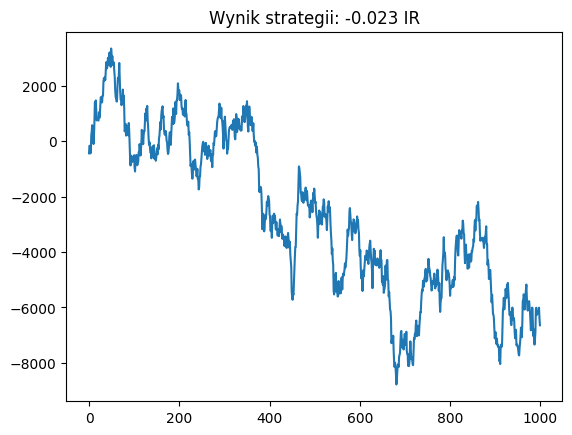

In [52]:
fig, ax = plt.subplots()

ax.plot(np.cumsum(strategy_results))

ax.set_title(f'Wynik strategii: {round(strategy_metrics, 3)} IR')

plt.show()

# strategie uczestników

In [8]:
# Dominik S
def strategy_1(posted_path, position):
    '''
    Parametry:
    
    -posted_path(list): Lista zawierająca ceny z poprzednich i aktualnych iteracji ścieżki cenowej.
    
    -position(float): Aktualna pozycja przedstawiona liczbowo.
    
    Zwraca:
    
    - signal(float): Sygnał strategii na daną iteracje.
    
    '''
    
    # TUTAJ TEKST LOGICZNY STRATEGII:

    signal= 1
        
    return signal

In [9]:
# Mikolaj M
def strategy_2(posted_path, position):
    '''
    Parametry:
    
    -posted_path(list): Lista zawierająca ceny z poprzednich i aktualnych iteracji ścieżki cenowej.
    
    -position(float): Aktualna pozycja przedstawiona liczbowo.
    
    Zwraca:
    
    - signal(float): Sygnał strategii na daną iteracje.
    
    '''
    # TUTAJ TEKST LOGICZNY STRATEGII:

    signal= 1

    return signal

In [10]:
# Agata T
def strategy_3(posted_path, position):
    '''
    Parametry:
    
    -posted_path(list): Lista zawierająca ceny z poprzednich i aktualnych iteracji ścieżki cenowej.
    
    -position(float): Aktualna pozycja przedstawiona liczbowo.
    
    Zwraca:
    
    - signal(float): Sygnał strategii na daną iteracje.
    
    '''
    
    # TUTAJ TEKST LOGICZNY STRATEGII:

    signal= 1
        
    return signal

# test strategii uczestnikow

In [11]:
strategies_results = {
    'Dominik S': [],
    'Mikolaj M': [],
    'Agata T': []
}

C:\Users\Frane\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Frane\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Frane\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Frane\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Frane\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.

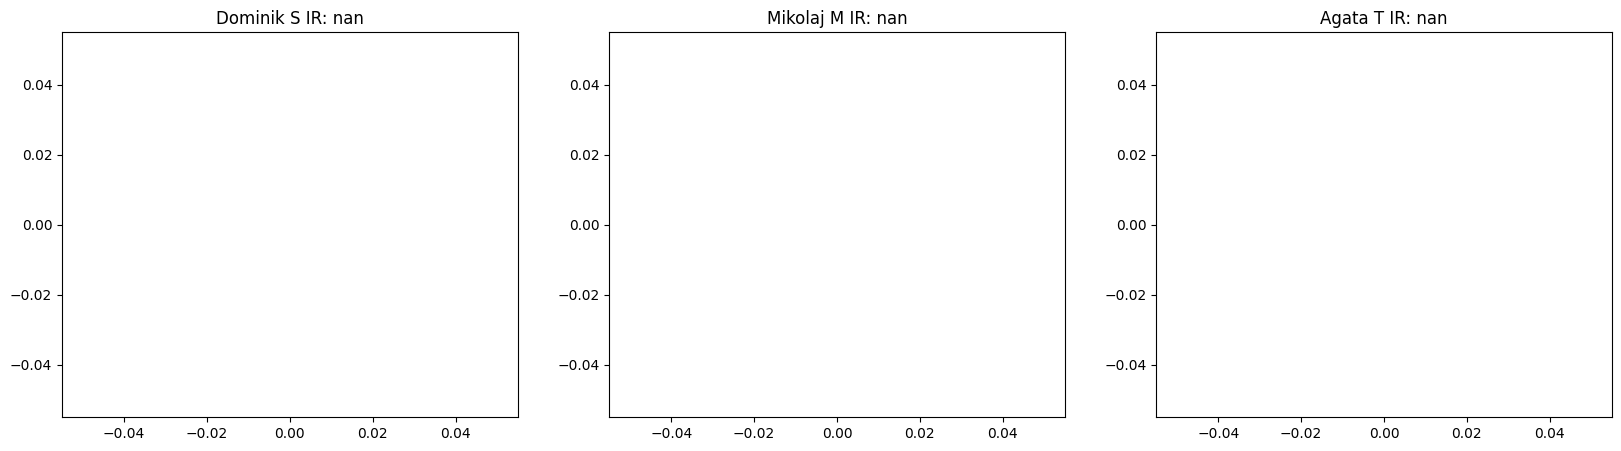

In [12]:
fig,ax = plt.subplots(1, 3, figsize=(20,5))

for i, name in enumerate(strategies_results.keys()):
    results = strategies_results[name]
    results_metrics = np.mean(results)/np.std(results)
    
    ax[i].set_title(f'{name} IR: {round(results_metrics, 3)}')
    ax[i].plot(np.cumsum(results))
    
plt.show()